In [7]:
import numpy as np
import pandas as pd 

df=pd.read_csv("heart.csv")

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
 df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("num of pepole without heart disease: "+ str(healthy))
print ("num of pepole with chance for heart disease: "+ str(sick))

num of pepole without heart disease: 138
num of pepole with chance for heart disease: 165


In [13]:
features = df.columns.tolist()
features.remove('target')
print(features)
X = df[features]
y = df["target"]

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [14]:
X = df[features]
y = df["target"]

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas

def func(X,y,a):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=123)
    #print(X_train)
    #print(X_test)
    #print(y_train)
    #print(y_test)
    rg = RandomForestRegressor(criterion='barron',alpha=a)
    rg.fit(X_train, y_train)
    y_pred = rg.predict(X_test)
    #print(y_pred)
    #print(y_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2score=metrics.r2_score(y_test, y_pred)
    return ([a, mae, mse,r2score])

In [176]:
results={}
results['heart'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['heart'].append(func(X, y, alpha))

-40
-30
-20
-10


In [177]:
results

{'heart': [[-40, 0.393132443303692, 0.3671175119147797, -0.5473681094302771],
  [-30, 0.3931370275395267, 0.36710288024661814, -0.5473064382324557],
  [-20, 0.39311056882892265, 0.36718734080299414, -0.54766243206876],
  [-10, 0.39311778214059456, 0.36716431200300587, -0.5475653676968795]]}

In [163]:
#from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
#from sklearn.metrics import roc_auc_score
#import matplotlib.pyplot as plt
def Barronfunc(X_trainf,X_testf,y_trainf,y_testf,a):  
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=123)
    #print(X_trainf)
    rg = RandomForestRegressor(criterion='barron',alpha=a)
    rg.fit(X_trainf, y_trainf)
    y_pred = rg.predict(X_testf)
    #print(y_pred)
    #print(y_test)
    mae=metrics.mean_absolute_error(y_testf, y_pred)
    mse = metrics.mean_squared_error(y_testf, y_pred)
    r2score=metrics.r2_score(y_testf, y_pred)
    #ax = plt.gca()
    #rfc_disp = plot_roc_curve(rg, X_test, y_test, ax=ax, alpha=0.8)
    #plt.show()
    #pred_prob1 = rg.predict_proba(X_test)
    #fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
    # roc curve for tpr = fpr 
    #random_probs = [0 for i in range(len(y_test))]
    #p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    #auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
    #rint('AUC score:',auc_score1)
    # plot the roc curve for the model
    return ([a, mae, mse,r2score])
    

In [24]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=123)


In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [26]:
y_train

107    1
155    1
251    0
171    0
53     1
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64

In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [28]:
y_test

11     1
292    0
269    0
268    0
94     1
201    0
81     1
20     1
54     1
196    0
202    0
31     1
250    0
256    0
245    0
204    0
120    1
281    0
199    0
89     1
159    1
247    0
115    1
52     1
203    0
241    0
167    0
296    0
223    0
150    1
165    0
Name: target, dtype: int64

In [57]:
results_split={}
results_split['heart'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results_split['heart'].append(Barronfunc(X_train, X_test, y_train, y_test, alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [58]:
results_split

{'heart': [[-40,
   0.39311440595536473,
   0.36717509036185136,
   -0.5476107975339433],
  [-30, 0.3931212349911959, 0.3671532893549651, -0.5475189082022867],
  [-20, 0.3931252358207748, 0.3671405179605453, -0.5474650778951051],
  [-10, 0.39312047662493316, 0.36715571027234245, -0.547529112156671]]}

In [19]:
###############Mislabelling 10% of data##########################

In [59]:
Y_train10,Y_train90=train_test_split(y_train, train_size = 0.10,random_state=123,shuffle=False)

In [60]:
Y_train10

107    1
155    1
251    0
171    0
53     1
41     1
29     1
142    1
75     1
72     1
270    0
266    0
30     1
19     1
229    0
191    0
216    0
90     1
22     1
184    0
284    0
80     1
71     1
299    0
35     1
95     1
26     1
Name: target, dtype: int64

In [61]:
Y_train90

259    0
143    1
42     1
102    1
261    0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 245, dtype: int64

In [62]:
#no. of label as 0 before mislabelling
(Y_train10 == 0).sum()

10

In [63]:
#no. of label as 1 before mislabelling
(Y_train10 == 1).sum()

17

In [64]:
#changing labels
Y_train10=Y_train10.eq(0).mul(1)

In [65]:
Y_train10

107    0
155    0
251    1
171    1
53     0
41     0
29     0
142    0
75     0
72     0
270    1
266    1
30     0
19     0
229    1
191    1
216    1
90     0
22     0
184    1
284    1
80     0
71     0
299    1
35     0
95     0
26     0
Name: target, dtype: int64

In [66]:
#no. of label as 0 after mislabelling
(Y_train10 == 0).sum()

17

In [67]:
#no. of label as 1 after mislabelling
(Y_train10 == 1).sum()

10

In [68]:
y_train_10mislabel = pd.concat([Y_train10, Y_train90])

In [69]:
y_train_10mislabel

107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64

In [31]:
###############Mislabelling 15% of data##########################

In [70]:
Y_train15,Y_train85=train_test_split(y_train, train_size = 0.15,random_state=123,shuffle=False)

In [71]:
print(Y_train15)
print(Y_train85)

107    1
155    1
251    0
171    0
53     1
41     1
29     1
142    1
75     1
72     1
270    0
266    0
30     1
19     1
229    0
191    0
216    0
90     1
22     1
184    0
284    0
80     1
71     1
299    0
35     1
95     1
26     1
259    0
143    1
42     1
102    1
261    0
228    0
288    0
78     1
124    1
200    0
197    0
24     1
174    0
Name: target, dtype: int64
175    0
105    1
220    0
61     1
179    0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 232, dtype: int64


In [72]:
#no. of label as 0 before mislabelling
print((Y_train15 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train15 == 1).sum())

17
23


In [73]:
#changing labels
Y_train15=Y_train15.eq(0).mul(1)
#no. of label as 0 before mislabelling
print((Y_train15 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train15 == 1).sum())

23
17


In [74]:
Y_train15

107    0
155    0
251    1
171    1
53     0
41     0
29     0
142    0
75     0
72     0
270    1
266    1
30     0
19     0
229    1
191    1
216    1
90     0
22     0
184    1
284    1
80     0
71     0
299    1
35     0
95     0
26     0
259    1
143    0
42     0
102    0
261    1
228    1
288    1
78     0
124    0
200    1
197    1
24     0
174    1
Name: target, dtype: int64

In [75]:
y_train_15mislabel = pd.concat([Y_train15, Y_train85])

In [76]:
print(y_train_15mislabel)

107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [77]:
###############Mislabelling 20% of data##########################

In [78]:
Y_train20,Y_train80=train_test_split(y_train, train_size = 0.20,random_state=123,shuffle=False)

In [79]:
#no. of label as 0 before mislabelling
print((Y_train20 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train20 == 1).sum())

#changing labels
Y_train20=Y_train20.eq(0).mul(1)
#no. of label as 0 before mislabelling
print((Y_train20 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train20 == 1).sum())

y_train_20mislabel = pd.concat([Y_train20, Y_train80])

print(y_train_20mislabel)

22
32
32
22
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [80]:
###############Mislabelling 25% of data##########################

In [81]:
Y_train25,Y_train75=train_test_split(y_train, train_size = 0.25,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train25 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train25 == 1).sum())

#changing labels
Y_train25=Y_train25.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train25 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train25 == 1).sum())

y_train_25mislabel = pd.concat([Y_train25, Y_train75])

print(y_train_25mislabel)

31
37
37
31
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [82]:
###############Mislabelling 30% of data##########################

In [83]:
Y_train30,Y_train70=train_test_split(y_train, train_size = 0.30,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train30 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train30 == 1).sum())

#changing labels
Y_train30=Y_train30.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train30 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train30 == 1).sum())

y_train_30mislabel = pd.concat([Y_train30, Y_train70])

print(y_train_30mislabel)

36
45
45
36
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [84]:
###############Mislabelling 40% of data##########################

In [85]:
Y_train40,Y_train60=train_test_split(y_train, train_size = 0.40,random_state=123,shuffle=False)

#no. of label as 0 before mislabelling
print((Y_train40 == 0).sum())
#no. of label as 1 before mislabelling
print((Y_train40 == 1).sum())

#changing labels
Y_train40=Y_train40.eq(0).mul(1)
#no. of label as 0 after mislabelling
print((Y_train40 == 0).sum())
#no. of label as 1 after mislabelling
print((Y_train40 == 1).sum())

y_train_40mislabel = pd.concat([Y_train40, Y_train60])

print(y_train_40mislabel)

45
63
63
45
107    0
155    0
251    1
171    1
53     0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 272, dtype: int64


In [86]:
#########################Gaussian Noise################################

In [87]:
####Gaussian Noise Level 1 mu=0  sigma=0.1 ####
noise = np.random.normal(0, .1, X_train.shape)
print(noise)
X_train_gaus1 = X_train + noise
print(X_train_gaus1)

[[-0.11939838  0.13813347 -0.03079375 ...  0.06023718 -0.11208909
  -0.07576904]
 [ 0.02052069  0.02537469  0.00620282 ... -0.09650841 -0.0502373
   0.14338671]
 [ 0.15711194  0.01178245 -0.06342662 ...  0.09545095  0.00027146
   0.22190399]
 ...
 [ 0.01653799 -0.13713947 -0.05330196 ...  0.17881528 -0.10659302
  -0.02894346]
 [ 0.03043801  0.08884038  0.04673763 ... -0.18448523 -0.18738078
   0.06160277]
 [ 0.16708875 -0.08629914 -0.10549953 ...  0.19629873 -0.17112023
  -0.02884242]]
           age       sex        cp    trestbps        chol       fbs  \
107  44.880602  0.138133 -0.030794  138.126356  235.907651 -0.168109   
155  58.020521  0.025375  0.006203  129.996744  196.864306 -0.185539   
251  43.157112  1.011782 -0.063427  132.070041  246.896609  1.109961   
171  47.925214  1.058169  1.069432  109.869435  228.872231 -0.059008   
53   44.100744  0.053812  1.942314  107.899600  140.928618  0.050846   
..         ...       ...       ...         ...         ...       ...   
106  

In [118]:
####Gaussian Noise Level 2 mu=0  sigma=1 ####
noise = np.random.normal(0, 1, X_train.shape)
print(noise)
X_train_gaus2 = X_train + noise
print(X_train_gaus2)

[[ 1.26011977e+00  6.03944799e-01 -8.11163060e-01 ...  5.92963127e-01
  -2.23623089e-01  6.33543745e-01]
 [ 2.78461254e-01  1.05657361e+00  2.05898823e-01 ...  2.25749609e-01
   6.76986099e-01 -5.35020690e-01]
 [ 1.18944670e+00 -1.41750790e+00  1.87108456e+00 ...  1.01244913e+00
   1.21301444e+00 -1.91943220e-01]
 ...
 [-7.93536012e-01 -2.07109067e+00 -1.05267196e-03 ... -2.87570770e-01
  -1.91675337e+00 -3.54359387e-01]
 [-2.72515513e-01 -4.16875327e-01 -7.59527187e-01 ... -1.16591656e+00
   1.03997131e+00 -3.09605663e+00]
 [-2.06262874e-01  8.93352039e-01  3.52293686e-02 ...  1.15835889e+00
  -1.98514842e+00 -2.58786546e-01]]
           age       sex        cp    trestbps        chol       fbs  \
107  46.260120  0.603945 -0.811163  138.465794  235.393962  0.058125   
155  58.278461  1.056574  0.205899  130.282315  198.081432  0.471025   
251  44.189447 -0.417508  1.871085  131.561522  246.913300  1.487649   
171  48.049000  2.133440 -0.192971  110.962408  230.562842  0.158993   
53  

In [88]:
####Gaussian Noise Level 3 mu=0  sigma=5 ####
noise = np.random.normal(0, 5, X_train.shape)
X_train_gaus3 = X_train + noise
print(X_train_gaus3)

           age        sex         cp    trestbps        chol       fbs  \
107  41.394739   6.592883   4.852430  138.604959  236.133197  5.384483   
155  57.674007  -0.474298   7.234409  133.182537  201.037447 -5.379513   
251  39.536081  -3.043210  -5.341562  136.155089  241.136165 -3.338949   
171  44.901758   7.684879   3.025075  116.062169  220.854532  3.007970   
53   44.111243  -0.378761   0.569373  112.557935  137.060653  1.642110   
..         ...        ...        ...         ...         ...       ...   
106  69.796320  10.720879   3.271798  160.028344  235.019532  7.461236   
83   41.222879   2.928036   0.419293  160.084591  299.781631 -7.217855   
17   69.810885   1.000284   9.756581  140.946027  226.174814  2.561633   
230  47.405731   6.300378  -9.696266  105.445216  240.580957 -8.935216   
98   42.348173  -2.248908  11.219066  134.706613  318.912085  6.249070   

      restecg     thalach     exang   oldpeak      slope        ca      thal  
107 -0.898164  149.118412  5.339

In [104]:
#Calling Barron function without mislabelling
results={}
results['gauslevel1_without_mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_without_mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train,y_test,alpha))


-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [105]:
#Calling Barron function with 10% mislabelling
results['gauslevel1_with_10%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_10%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_10mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [107]:
#Calling Barron function with 15% mislabelling for level1 
results['gauslevel1_with_15%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_15%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_15mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [109]:
#Calling Barron function with 20% mislabelling for level1 
results['gauslevel1_with_20%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_20%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_20mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [110]:
#Calling Barron function with 25% mislabelling for level1 
results['gauslevel1_with_25%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_25%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_25mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [114]:
#Calling Barron function with 30% mislabelling for level1 
results['gauslevel1_with_30%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_30%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_30mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [115]:
#Calling Barron function with 40% mislabelling for level1
results['gauslevel1_with_40%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel1_with_40%mislabel'].append(Barronfunc(X_train_gaus1,X_test,y_train_40mislabel,y_test,alpha))

-40
Calling Random Forest Function
-30
Calling Random Forest Function
-20
Calling Random Forest Function
-10
Calling Random Forest Function


In [119]:
#Calling Barron function with mislabelling for level2 
results['gauslevel2_without_mislabel'] =[]
results['gauslevel2_with_10%mislabel'] = []
results['gauslevel2_with_15%mislabel'] = []
results['gauslevel2_with_20%mislabel'] = []
results['gauslevel2_with_25%mislabel'] = []
results['gauslevel2_with_30%mislabel'] = []
results['gauslevel2_with_40%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel2_without_mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train,y_test,alpha))
    results['gauslevel2_with_10%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_10mislabel,y_test,alpha))
    results['gauslevel2_with_15%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_15mislabel,y_test,alpha))
    results['gauslevel2_with_20%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_20mislabel,y_test,alpha))
    results['gauslevel2_with_25%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_25mislabel,y_test,alpha))
    results['gauslevel2_with_30%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_30mislabel,y_test,alpha))
    results['gauslevel2_with_40%mislabel'].append(Barronfunc(X_train_gaus2,X_test,y_train_40mislabel,y_test,alpha))

-40
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-30
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-20
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-10
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function


In [121]:
#Calling Barron function with mislabelling for level3 gaussian noise 
results['gauslevel3_without_mislabel'] =[]
results['gauslevel3_with_10%mislabel'] = []
results['gauslevel3_with_15%mislabel'] = []
results['gauslevel3_with_20%mislabel'] = []
results['gauslevel3_with_25%mislabel'] = []
results['gauslevel3_with_30%mislabel'] = []
results['gauslevel3_with_40%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    results['gauslevel3_without_mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train,y_test,alpha))
    results['gauslevel3_with_10%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_10mislabel,y_test,alpha))
    results['gauslevel3_with_15%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_15mislabel,y_test,alpha))
    results['gauslevel3_with_20%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_20mislabel,y_test,alpha))
    results['gauslevel3_with_25%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_25mislabel,y_test,alpha))
    results['gauslevel3_with_30%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_30mislabel,y_test,alpha))
    results['gauslevel3_with_40%mislabel'].append(Barronfunc(X_train_gaus3,X_test,y_train_40mislabel,y_test,alpha))

-40
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-30
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-20
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-10
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function


In [122]:
results

{'gauslevel1_without_mislabel': [[-40,
   0.39312100391412746,
   0.36715402701525623,
   -0.5475220173757067],
  [-30, 0.3931192436809305, 0.36715964622285235, -0.5475457018428114],
  [-20, 0.39310908636808084, 0.3671920738742194, -0.5476823815487928],
  [-10, 0.3931164442236086, 0.36716858320491874, -0.5475833704382755]],
 'gauslevel1_with_10%mislabel': [[-40,
   0.3930563792586832,
   0.3673604085360176,
   -0.5483918973820736],
  [-30, 0.3930624887653023, 0.367340890561574, -0.5483096308318969],
  [-20, 0.3930625796450872, 0.36734060023996357, -0.5483084071517759],
  [-10, 0.39306136212539955, 0.3673444897157342, -0.5483248009509669]],
 'gauslevel1_with_15%mislabel': [[-40,
   0.3930709407549871,
   0.3673138914956718,
   -0.5481958321374583],
  [-30, 0.3930726699311626, 0.3673083681544225, -0.5481725517385962],
  [-20, 0.3930752408023832, 0.3673001564844051, -0.5481379402697948],
  [-10, 0.39307018004570027, 0.3673163213933748, -0.5482060739431274]],
 'gauslevel1_with_20%mislabel'

In [73]:
#########################Poisson Noise################################

In [128]:
#lambda=10
noise = np.random.poisson(1, X_train.shape)
print(noise)
new_X_train_poisson_1 = X_train + noise
print(new_X_train_poisson_1)

[[0 0 0 ... 1 2 0]
 [0 1 1 ... 0 1 0]
 [2 1 0 ... 1 1 2]
 ...
 [0 1 1 ... 0 1 2]
 [0 1 0 ... 1 0 0]
 [0 3 1 ... 1 1 1]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   45    0   0       140   236    1        0      152      1      1.2   
155   58    1   1       132   197    1        3      131      1      1.6   
251   45    2   0       134   247    2        0      143      2      1.1   
171   49    2   3       112   230    0        4      169      1      2.0   
53    45    0   2       108   144    4        5      177      0      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   69    2   5       163   234    2        0      132      0      2.1   
83    53    3   4       154   298    2        4      179      0      1.2   
17    66    1   4       151   228    0        4      115      3      2.6   
230   47    2   2       108   244    0        1      154      2      2.0   
98    43    4   3       130   316    0      

In [129]:
#lambda=10
noise = np.random.poisson(4, X_train.shape)
print(noise)
new_X_train_poisson_4 = X_train + noise
print(new_X_train_poisson_4)

[[4 6 5 ... 5 4 5]
 [4 5 3 ... 6 4 6]
 [1 2 5 ... 6 6 3]
 ...
 [5 3 3 ... 8 4 4]
 [5 3 5 ... 4 4 5]
 [2 6 3 ... 5 5 2]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   49    6   5       140   240    8        3      155      5      3.2   
155   62    5   3       134   200    8        3      135      3      7.6   
251   44    3   5       136   249    4        3      148      7      6.1   
171   55    2   5       114   231    5        5      168      4      4.0   
53    48    0   6       112   143    4        2      177      6      5.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   76    2   8       166   237    3        8      135      4      0.1   
83    53    3   7       161   303    6        4      184      6      4.2   
17    71    3   6       155   230    4        5      115      1      5.6   
230   52    4   7       112   249    3        6      154      2      1.0   
98    45    7   5       134   319    2      

In [130]:
#lambda=10
noise = np.random.poisson(10, X_train.shape)
print(noise)
new_X_train_poisson_10 = X_train + noise
print(new_X_train_poisson_10)

[[15 10 11 ...  8 10 12]
 [12 14  8 ...  7 10  7]
 [ 4 14  3 ...  9 10 13]
 ...
 [10 10 12 ... 10  9 12]
 [11  4  8 ... 11 11  8]
 [ 6 12  8 ...  8 14 11]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107   60   10  11       148   249    8        8      169     12      7.2   
155   70   14   8       137   206   10       11      136     12      6.6   
251   47   15   3       144   258   12       12      154     11      9.1   
171   57   10   9       118   239    7       12      179     11      8.0   
53    55   13  10       122   159   11        8      189      6     13.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106   81   11  10       173   240   12        9      140      9     17.1   
83    60   13  10       162   307   10        5      186      8      9.2   
17    76   10  15       158   237   13       11      121      8     11.6   
230   58    5  10       121   255   12       11      161      9     12.0   
98    49

In [132]:
#Calling Barron function with mislabelling for level1 poisson noise 
poisson_results={}
poisson_results['poissonlevel1_without_mislabel'] =[]
poisson_results['poissonlevel1_with_10%mislabel'] = []
poisson_results['poissonlevel1_with_15%mislabel'] = []
poisson_results['poissonlevel1_with_20%mislabel'] = []
poisson_results['poissonlevel1_with_25%mislabel'] = []
poisson_results['poissonlevel1_with_30%mislabel'] = []
poisson_results['poissonlevel1_with_40%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    poisson_results['poissonlevel1_without_mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train,y_test,alpha))
    poisson_results['poissonlevel1_with_10%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_10mislabel,y_test,alpha))
    poisson_results['poissonlevel1_with_15%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_15mislabel,y_test,alpha))
    poisson_results['poissonlevel1_with_20%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_20mislabel,y_test,alpha))
    poisson_results['poissonlevel1_with_25%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_25mislabel,y_test,alpha))
    poisson_results['poissonlevel1_with_30%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_30mislabel,y_test,alpha))
    poisson_results['poissonlevel1_with_40%mislabel'].append(Barronfunc(new_X_train_poisson_1,X_test,y_train_40mislabel,y_test,alpha))

-40
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-30
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-20
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-10
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function


In [133]:
poisson_results

{'poissonlevel1_without_mislabel': [[-40,
   0.3931215192669748,
   0.3671523818729234,
   -0.5475150832450844],
  [-30, 0.39312998054971454, 0.36712537271439843, -0.5474012420111263],
  [-20, 0.3931228276706624, 0.3671482051497533, -0.5474974787233018],
  [-10, 0.3931178811739086, 0.36716399584920034, -0.547564035136322]],
 'poissonlevel1_with_10%mislabel': [[-40,
   0.39307358820507454,
   0.3673054350480099,
   -0.5481601889523569],
  [-30, 0.3930656801321888, 0.3673306957185827, -0.5482666604629731],
  [-20, 0.3930778621646682, 0.3672917838068287, -0.5481026501682555],
  [-10, 0.39306596990725595, 0.36732977004996487, -0.5482627588509479]],
 'poissonlevel1_with_15%mislabel': [[-40,
   0.3930668591319214,
   0.3673269294970589,
   -0.5482507861696206],
  [-30, 0.39306360205043084, 0.36733733411936736, -0.5482946407399645],
  [-20, 0.39307880232045617, 0.3672887809982564, -0.5480899935935275],
  [-10, 0.39309060831242876, 0.36725107622665837, -0.547931071288678]],
 'poissonlevel1_wit

In [148]:
#Calling Barron function with mislabelling for level1 poisson noise 
poisson_results_l2={}
poisson_results_l2['poissonlevel2_without_mislabel'] =[]
poisson_results_l2['poissonlevel2_with_10%mislabel'] = []
poisson_results_l2['poissonlevel2_with_15%mislabel'] = []
poisson_results_l2['poissonlevel2_with_20%mislabel'] = []
poisson_results_l2['poissonlevel2_with_25%mislabel'] = []
poisson_results_l2['poissonlevel2_with_30%mislabel'] = []
poisson_results_l2['poissonlevel2_with_40%mislabel'] = []
for alpha in [-40, -30, -20, -10]:
    print(alpha)
    poisson_results_l2['poissonlevel2_without_mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_10%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_10mislabel,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_15%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_15mislabel,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_20%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_20mislabel,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_25%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_25mislabel,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_30%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_30mislabel,y_test,alpha))
    poisson_results_l2['poissonlevel2_with_40%mislabel'].append(Barronfunc(new_X_train_poisson_10,X_test,y_train_40mislabel,y_test,alpha))

-40
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-30
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-20
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
-10
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function
Calling Random Forest Function


In [149]:
poisson_results_l2

{'poissonlevel2_without_mislabel': [[-40,
   0.3931165662142002,
   0.3671681937559871,
   -0.5475817289451907],
  [-30, 0.39312047512467124, 0.3671557150616212, -0.5475291323430609],
  [-20, 0.3931214585739898, 0.36715257562041226, -0.5475158998737546],
  [-10, 0.3931265865542982, 0.3671362063089107, -0.5474469046616803]],
 'poissonlevel2_with_10%mislabel': [[-40,
   0.39306100096301444,
   0.3673456434925277,
   -0.548329664018943],
  [-30, 0.3930622199494441, 0.36734174931388397, -0.5483132503975543],
  [-20, 0.39306837423970625, 0.36732208968496444, -0.5482303867861873],
  [-10, 0.3930686775483987, 0.36732112081614665, -0.5482263030891088]],
 'poissonlevel2_with_15%mislabel': [[-40,
   0.3930690009928985,
   0.3673200876308397,
   -0.5482219483036703],
  [-30, 0.39306896910939626, 0.36732018947677314, -0.5482223775753459],
  [-20, 0.3930831514535588, 0.36727489054502055, -0.5480314465515992],
  [-10, 0.3930759918903305, 0.36729775746864607, -0.5481278286288103]],
 'poissonlevel2_wi

In [ ]:
#########################Uniform Noise################################

In [150]:
noise = np.random.uniform(low=0.0, high=1.0, size=X_train.shape)
print(noise)
new_X_train_uniform = X_train + noise
print(new_X_train_uniform)

[[0.60875985 0.03408931 0.96324869 ... 0.69505749 0.81472093 0.7242671 ]
 [0.36797073 0.92189492 0.76761539 ... 0.51848932 0.89654095 0.27094488]
 [0.32244407 0.16639332 0.24379884 ... 0.40596301 0.57884496 0.91209711]
 ...
 [0.14685426 0.18306256 0.18512162 ... 0.19127734 0.70487552 0.15833928]
 [0.77605759 0.34934953 0.75136537 ... 0.03819293 0.34310693 0.77541369]
 [0.13180515 0.10182583 0.26729121 ... 0.90842947 0.73462558 0.40542616]]
           age       sex        cp    trestbps        chol       fbs  \
107  45.608760  0.034089  0.963249  138.096057  236.447910  0.090050   
155  58.367971  0.921895  0.767615  130.532093  197.277363  0.593679   
251  43.322444  1.166393  0.243799  132.990445  247.650233  1.057039   
171  48.104384  1.736009  1.774300  110.863771  229.830974  0.914398   
53   44.731159  0.116308  2.291599  108.642416  141.016549  0.248924   
..         ...       ...       ...         ...         ...       ...   
106  69.602204  1.188530  3.476461  160.952431  234.

In [168]:
Barronfunc(X_train,X_test,y_train,y_test,-20)

[-20, 0.39312413970643845, 0.3671440168995578, -0.5474798256161182]

In [167]:
#Calling Barron function with mislabelling for level3 gaussian noise 
print(Barronfunc(new_X_train_uniform,X_test,y_train_10mislabel,y_test,-20))
print(Barronfunc(new_X_train_uniform,X_test,y_train_15mislabel,y_test,-20))
print(Barronfunc(new_X_train_uniform,X_test,y_train_20mislabel,y_test,-20))
print(Barronfunc(new_X_train_uniform,X_test,y_train_25mislabel,y_test,-20))
print(Barronfunc(new_X_train_uniform,X_test,y_train_30mislabel,y_test,-20))
print(Barronfunc(new_X_train_uniform,X_test,y_train_40mislabel,y_test,-20))

[-20, 0.3930737870075141, 0.36730480004716276, -0.548157512479488]
[-20, 0.39308877690120086, 0.3672569248425568, -0.5479557226916532]
[-20, 0.3930253091762888, 0.3674596904463353, -0.5488103619251234]
[-20, 0.39307535249191755, 0.3672997997405561, -0.5481364366257646]
[-20, 0.3930508049395819, 0.36737821803004234, -0.5484669628371517]
[-20, 0.3929747115581394, 0.3676214520435884, -0.5494921728679314]


In [ ]:
#########################Spike Noise################################

In [178]:
X_train[X_train > 100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,NaN,NaN,NaN,138.0,236,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,130.0,197,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,132.0,247,NaN,NaN,143.0,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,110.0,229,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,108.0,141,NaN,NaN,175.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,160.0,234,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,152.0,298,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,150.0,226,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,108.0,243,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN


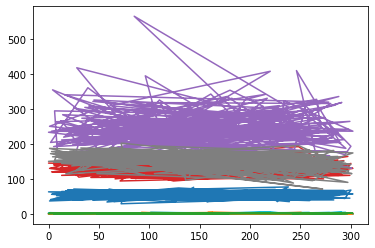

In [179]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks 
plt.plot(X_train)

In [180]:
npX_train=X_train.to_numpy()
from scipy.signal import argrelextrema
c_max_index = argrelextrema(npX_train, np.greater)

In [181]:
print(npX_train[c_max_index[0]])#peak points

[[58.  0.  0. ...  1.  0.  2.]
 [58.  0.  0. ...  1.  0.  2.]
 [58.  0.  0. ...  1.  0.  2.]
 ...
 [52.  1.  3. ...  1.  0.  3.]
 [66.  0.  3. ...  0.  0.  2.]
 [66.  0.  3. ...  0.  0.  2.]]


ValueError: x and y must be the same size

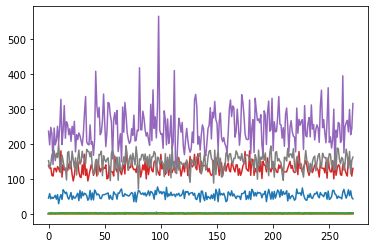

In [182]:
plt.plot(npX_train)
plt.scatter(c_max_index[0],npX_train[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [183]:
noise = np.random.randint(low=0.0, high=100, size=X_train.shape)
print(noise)
new_X_train_spike = X_train + noise
print(new_X_train_spike)

[[77  4 76 ... 17 97 99]
 [57 59  7 ... 76 16  6]
 [76 86 78 ... 93 11 12]
 ...
 [44 60 51 ... 81 65 64]
 [37 67 27 ...  6  8 43]
 [89 77 26 ... 27 35 99]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
107  122    4  76       159   311    9       44      159     81     33.2   
155  115   59   7       158   271   93       96      199     94      6.6   
251  119   87  78       203   307   92       64      169     26     12.1   
171  140   49  95       169   284   81       66      262     58     67.0   
53    75   16  37       123   156   39       71      249     46     87.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
106  102   55  65       185   296  100       43      141     77      6.1   
83   108   14  84       208   379    3       14      185     63     21.2   
17   110   60  54       193   303   36       11      156     22     96.6   
230   84   68  29       157   276   21       83      241     31     21.0   
98   132

In [184]:
npX_train=new_X_train_spike.to_numpy()
from scipy.signal import argrelextrema
c_max_index = argrelextrema(npX_train, np.greater)

In [185]:
print(npX_train[c_max_index[0]])#peak points

[[115.  59.   7. ...  77.  16.   8.]
 [115.  59.   7. ...  77.  16.   8.]
 [115.  59.   7. ...  77.  16.   8.]
 ...
 [110.  60.  54. ...  81.  65.  66.]
 [ 84.  68.  29. ...   8.   8.  45.]
 [ 84.  68.  29. ...   8.   8.  45.]]


ValueError: x and y must be the same size

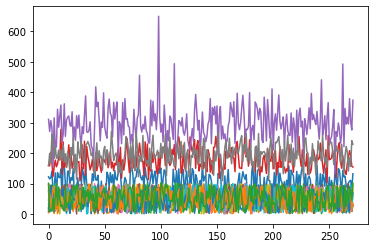

In [186]:
plt.plot(npX_train)
plt.scatter(c_max_index[0],npX_train[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [189]:
Barronfunc(new_X_train_spike,X_test,y_train,y_test,-20)

[-20, 0.39312051238949475, 0.36715559610134507, -0.5475286309359322]

In [190]:
#Calling Barron function with mislabelling for level3 gaussian noise 
print(Barronfunc(new_X_train_spike,X_test,y_train_10mislabel,y_test,-20))
print(Barronfunc(new_X_train_spike,X_test,y_train_15mislabel,y_test,-20))
print(Barronfunc(new_X_train_spike,X_test,y_train_20mislabel,y_test,-20))
print(Barronfunc(new_X_train_spike,X_test,y_train_25mislabel,y_test,-20))
print(Barronfunc(new_X_train_spike,X_test,y_train_30mislabel,y_test,-20))
print(Barronfunc(new_X_train_spike,X_test,y_train_40mislabel,y_test,-20))

[-20, 0.39305386603225484, 0.36736843793820717, -0.5484257406079691]
[-20, 0.3930682835793599, 0.3673223792849573, -0.5482316074247537]
[-20, 0.3930422832377736, 0.36740544652683604, -0.5485817285626724]
[-20, 0.39307292200965993, 0.3673075629741035, -0.5481691579741814]
[-20, 0.39304767441610944, 0.36738822033117513, -0.5485091216590314]
[-20, 0.3929717345828951, 0.36763097262094996, -0.549532301266372]


In [ ]:
#########################Salt & Pepper Noise################################

In [191]:
maxValues = X_train.max()
 
print(maxValues)
minValues = X_train.min()
 
print(minValues)

age          77.0
sex           1.0
cp            3.0
trestbps    192.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       5.6
slope         2.0
ca            4.0
thal          3.0
dtype: float64
age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
dtype: float64


In [192]:
####Gaussian Noise Level 1 mu=0  sigma=0.1 ####
noise = np.random.normal(0, 1, X_train.shape)
print(noise)

[[-0.17143449 -1.30222996 -2.59815509 ...  0.75448345 -0.49895296
  -1.25584571]
 [ 2.01250322  0.88457678 -1.29488853 ...  0.4645778   0.52810326
  -0.42025851]
 [-1.23433908  0.06246432 -0.93047541 ...  0.49990547 -0.82118374
   2.3219051 ]
 ...
 [-1.05022603  1.50099006 -0.57412927 ...  1.38522987  0.1652644
   0.22426844]
 [-0.32855419  0.25165383 -0.67879139 ...  0.79115539 -1.81982123
  -0.31225167]
 [-0.39896771 -2.31333288 -0.84276882 ... -0.85249282 -0.84185852
  -0.47692126]]


In [193]:
noise[noise < 0.5] = 0
noise[noise > 0.5] = 1
print(noise)

[[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [194]:
X_train_saltandpepper = X_train

In [195]:
X_train_saltandpepper=X_train_saltandpepper.clip(X_train_saltandpepper.max(),axis=1)

In [196]:
X_train_saltandpepper = noise + X_train_saltandpepper
print(X_train_saltandpepper)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
107  77.0  1.0  3.0     193.0  564.0  1.0      2.0    203.0    1.0      5.6   
155  78.0  2.0  3.0     192.0  564.0  1.0      2.0    202.0    1.0      5.6   
251  77.0  1.0  3.0     192.0  564.0  1.0      2.0    202.0    2.0      6.6   
171  77.0  1.0  4.0     193.0  564.0  2.0      3.0    202.0    1.0      5.6   
53   77.0  1.0  3.0     192.0  565.0  2.0      3.0    202.0    1.0      5.6   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
106  78.0  1.0  3.0     193.0  564.0  1.0      2.0    202.0    1.0      5.6   
83   77.0  2.0  4.0     193.0  564.0  1.0      3.0    202.0    1.0      5.6   
17   77.0  2.0  3.0     192.0  564.0  2.0      3.0    202.0    1.0      5.6   
230  77.0  1.0  3.0     192.0  564.0  1.0      3.0    202.0    1.0      5.6   
98   77.0  1.0  3.0     193.0  564.0  1.0      3.0    202.0    2.0      5.6   

     slope   ca  thal  
107    3.0  4.0   3.0  
155

In [197]:
X_train_saltandpepper.replace(X_train_saltandpepper.max(),X_train.min())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,77.0,1.0,3.0,94.0,564.0,1.0,2.0,71.0,1.0,5.6,0.0,4.0,3.0
155,29.0,0.0,3.0,192.0,564.0,1.0,2.0,202.0,1.0,5.6,2.0,0.0,3.0
251,77.0,1.0,3.0,192.0,564.0,1.0,2.0,202.0,0.0,0.0,2.0,4.0,0.0
171,77.0,1.0,0.0,94.0,564.0,0.0,0.0,202.0,1.0,5.6,2.0,4.0,3.0
53,77.0,1.0,3.0,192.0,126.0,0.0,0.0,202.0,1.0,5.6,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,29.0,1.0,3.0,94.0,564.0,1.0,2.0,202.0,1.0,5.6,2.0,4.0,3.0
83,77.0,0.0,0.0,94.0,564.0,1.0,0.0,202.0,1.0,5.6,2.0,4.0,3.0
17,77.0,0.0,3.0,192.0,564.0,0.0,0.0,202.0,1.0,5.6,0.0,4.0,3.0
230,77.0,1.0,3.0,192.0,564.0,1.0,0.0,202.0,1.0,5.6,0.0,4.0,3.0


In [198]:
Barronfunc(X_train_saltandpepper,X_test,y_train,y_test,-20)

[-20, 0.3931159488271821, 0.36717016473951086, -0.5475900364678501]

In [199]:
#Calling Barron function with mislabelling for level3 gaussian noise 
print(Barronfunc(X_train_saltandpepper,X_test,y_train_10mislabel,y_test,-20))
print(Barronfunc(X_train_saltandpepper,X_test,y_train_15mislabel,y_test,-20))
print(Barronfunc(X_train_saltandpepper,X_test,y_train_20mislabel,y_test,-20))
print(Barronfunc(X_train_saltandpepper,X_test,y_train_25mislabel,y_test,-20))
print(Barronfunc(X_train_saltandpepper,X_test,y_train_30mislabel,y_test,-20))
print(Barronfunc(X_train_saltandpepper,X_test,y_train_40mislabel,y_test,-20))

[-20, 0.39307038735781036, 0.3673156591838548, -0.5482032827880892]
[-20, 0.3930762421839447, 0.367296958022143, -0.548124459031927]
[-20, 0.39303695582508386, 0.3674224700948315, -0.5486534814084778]
[-20, 0.39306018270040155, 0.36734825755004846, -0.5483406820420897]
[-20, 0.39304478001736914, 0.3673974685347808, -0.5485481020259833]
[-20, 0.39296717830679834, 0.3676455445872869, -0.5495937208262394]


In [200]:
####Gaussian Noise Level 1 mu=0  sigma=0.1 ####
noise = np.random.chisquare(2,X_train.shape)
print(noise)

[[1.57405519 0.86529517 1.24005089 ... 0.33396645 1.53407536 0.6973069 ]
 [5.40937144 4.00914641 1.39566736 ... 0.11691321 0.89493562 1.35360579]
 [0.06781173 1.00668953 1.45676206 ... 0.68452636 3.4321785  1.15517199]
 ...
 [1.24854362 0.00542487 2.02627799 ... 4.4753257  1.64200332 2.41813649]
 [1.00686816 2.87771055 4.11553882 ... 1.957091   2.18316614 5.26671633]
 [2.39127867 0.81997467 2.02872906 ... 0.26468458 0.07771943 4.78823363]]
